##**Milestone 3: Performance Trend Analysis and Geographic, Category-Level Insights**

#### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the dataset

In [2]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('ticket_clusters.csv')
df.head()

Saving ticket_clusters.csv to ticket_clusters.csv


,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,First response time,Resolution time,...,Support Level,Country,Latitude,Longitude,Priority_Score,Resolution_Duration,First_Response_Duration,Category_Encoded,Cluster_ID,Similarity_Score
0,Closed,TCKT-100000,High,Email,General Inquiry,Security,Khalid Al-Salem,2024-07-04 12:42:00,2024-07-04 13:02:00,2024-07-04 14:30:00,...,L3,Oman,25.1856,50.9447,3,1.80,20.0,0,1.0,0.688161
1,Closed,TCKT-100001,High,Chat,Network Issue,Customer Service,Ahmed Al-Sabah,2024-05-23 20:03:00,2024-05-23 20:25:00,2024-05-23 22:00:00,...,L2,Qatar,23.2741,55.3867,3,1.95,22.0,0,1.0,0.683034
2,In Progress,TCKT-100002,Low,Phone,General Inquiry,Development,Mohammed Al-Mansoori,2024-04-13 20:51:00,2024-04-13 21:41:00,2024-04-14 00:47:00,...,L1,Bahrain,23.6264,50.1302,1,3.93,50.0,3,0.0,0.588455
3,Resolved,TCKT-100003,Critical,Chat,Access Request,Development,Mohammed Al-Khalifa,2024-05-13 12:50:00,2024-05-13 12:50:00,2024-05-13 13:48:00,...,L2,Kuwait,25.0736,54.8437,4,0.97,0.0,2,3.0,0.585260
4,Closed,TCKT-100004,Critical,Portal,Hardware Failure,Customer Service,Hassan Al-Nasser,2024-06-19 22:51:00,2024-06-19 23:00:00,2024-06-19 23:49:00,...,L3,Qatar,24.7362,51.4839,4,0.97,9.0,1,5.0,0.685498


In [13]:
df.columns

Index(['Status', 'Ticket ID', 'Priority', 'Source', 'Topic', 'Agent Group',
       'Agent Name', 'Created time', 'First response time', 'Resolution time',
       'Close time', 'Agent interactions', 'Survey results', 'Product group',
       'Support Level', 'Country', 'Latitude', 'Longitude', 'Priority_Score',
       'Resolution_Duration', 'First_Response_Duration', 'Category_Encoded',
       'Cluster_ID', 'Similarity_Score'],
      dtype='object')

 ## **Module 5: Performance Trend Analysis**

### Average Ticket Resolution Time

In [14]:
avg_resolution_time= df["Resolution_Duration"].mean().round(2)
print("The Average Resolution Time(hours) of the dataset is:", avg_resolution_time)

The Average Resolution Time(hours) of the dataset is: 2.33


### Comparing Average Resolution times across Ticket Types

In [15]:
avg_resolution_by_type = df.groupby('Topic')['Resolution_Duration'].mean().reset_index()

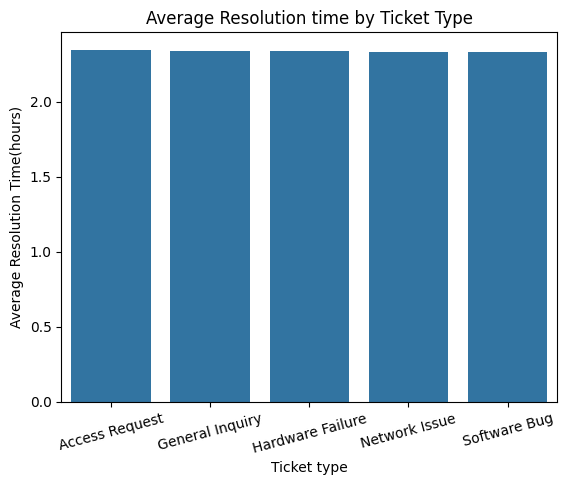

In [16]:
sns.barplot(data = avg_resolution_by_type,
            x = 'Topic', y = 'Resolution_Duration')

plt.title("Average Resolution time by Ticket Type", fontsize=12)
plt.xlabel("Ticket type")
plt.ylabel("Average Resolution Time(hours)")
plt.xticks(rotation=15)

plt.show()

In [17]:
print(avg_resolution_by_type)

              Topic  Resolution_Duration
0    Access Request             2.344688
1   General Inquiry             2.333746
2  Hardware Failure             2.335284
3     Network Issue             2.332439
4      Software Bug             2.326587


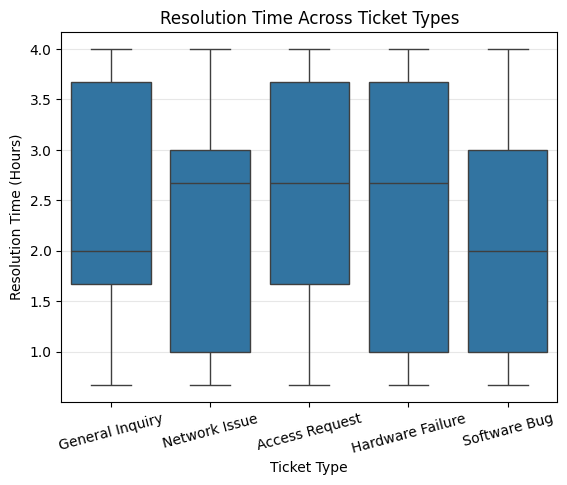

In [18]:
sns.boxplot(data=df, x='Topic', y='Resolution_Duration')

plt.title('Resolution Time Across Ticket Types', fontsize=12)
plt.xlabel('Ticket Type')
plt.ylabel('Resolution Time (Hours)')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

plt.show()


Insight:

- Software Bug and Network Issue tickets are resolved fastest as compared to other types.
- Access Request and Hardware Failure require maximum resolution times.


### Comparing Average Resolution times across Ticket Priorities

In [19]:
avg_resolution_by_priority = df.groupby('Priority')['Resolution_Duration'].mean().reset_index()

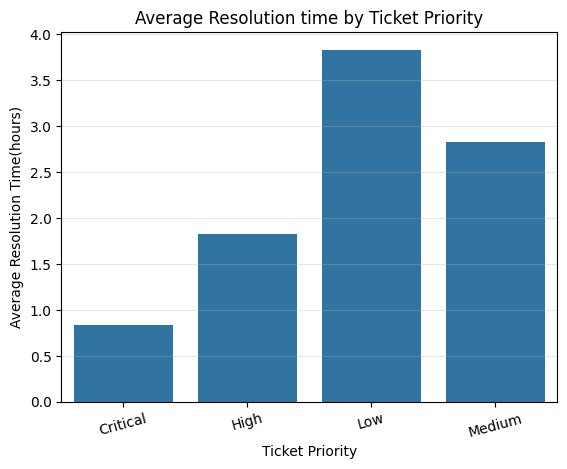

In [20]:
sns.barplot(data = avg_resolution_by_priority,
            x = 'Priority', y = 'Resolution_Duration')

plt.title("Average Resolution time by Ticket Priority", fontsize=12)
plt.xlabel("Ticket Priority")
plt.ylabel("Average Resolution Time(hours)")
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.show()

Insight:

Higher-priority tickets are resolved faster (as expected) indicating priortizing policies are working.

### Analyze High-Priority Tickets by Ticket Type

In [21]:
#filtering high-priority tickets
high_priority_df = df[df['Priority'].isin(['High', 'Critical'])]

In [22]:
# counting high-priority tickets per ticket type
high_priority_by_type = (
    high_priority_df
    .groupby('Topic')
    .size()
    .reset_index(name='High_Priority_Ticket_Count')
)

print(high_priority_by_type)

              Topic  High_Priority_Ticket_Count
0    Access Request                        9869
1   General Inquiry                       10172
2  Hardware Failure                        9954
3     Network Issue                        9997
4      Software Bug                        9877


### Ticket Type vs Resolution Time for Higher Priority Tickets

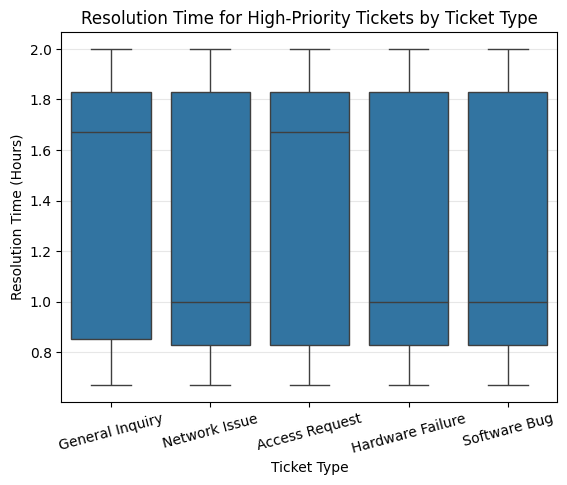

In [23]:
sns.boxplot(
    data=high_priority_df,
    x='Topic',
    y='Resolution_Duration'
)

plt.title('Resolution Time for High-Priority Tickets by Ticket Type', fontsize=12)
plt.xlabel('Ticket Type')
plt.ylabel('Resolution Time (Hours)')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

plt.show()


#### Filtered unresolved tickets which are are in progress, new or open to be resolved.

In [24]:
unresolved_tickets = df[ (df['Close time'].isna()) |
    ((df['Status'] != 'Resolved') & (df['Status'] != 'Closed'))
]

unresolved_count = unresolved_tickets.shape[0]
print("Unresolved tickets:", unresolved_count)

Unresolved tickets: 59851


#### Next filtered unresolved high-priority tickets

In [25]:
high_priority_unresolved = df[
    (
        (df['Close time'].isna()) |
        ((df['Status'] != 'Resolved') & (df['Status'] != 'Closed'))
    ) &
    (df['Priority'].isin(['High', 'Critical']))
]

count_high_priority_unresolved = high_priority_unresolved.shape[0]
print("High-priority unresolved tickets:", count_high_priority_unresolved)


High-priority unresolved tickets: 29965


### Unresolved Tickets per Priority

In [26]:
unresolved_by_priority = (
    unresolved_tickets
    .groupby('Priority')
    .size()
    .reset_index(name='Unresolved_Ticket_Count')
)
print(unresolved_by_priority)

   Priority  Unresolved_Ticket_Count
0  Critical                    15095
1      High                    14870
2       Low                    14874
3    Medium                    15012


Critical and Medium priority tickets have the largest backlog.

This suggests that the critical marked tickets are getting stuck in the resolution process.

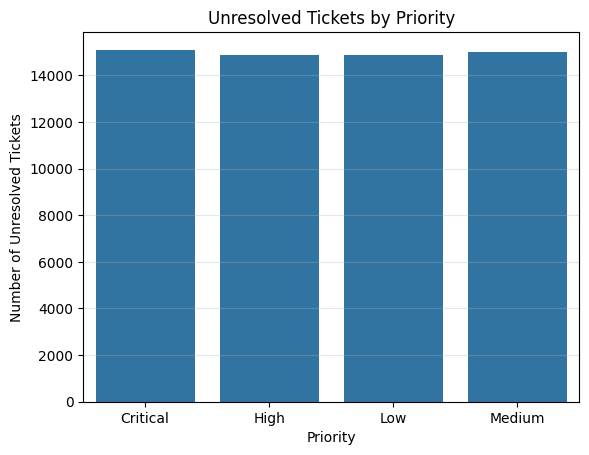

In [27]:
sns.barplot(
    data=unresolved_by_priority,
    x='Priority',
    y='Unresolved_Ticket_Count'
)

plt.title('Unresolved Tickets by Priority', fontsize=12)
plt.xlabel('Priority')
plt.ylabel('Number of Unresolved Tickets')
plt.grid(axis='y', alpha=0.3)

plt.show()


### Analyze Resolution Time trend over time(Monthly)

Filter resolved tickets

In [28]:
df_resolved = df[df['Status'].isin(['Resolved', 'Closed'])].copy()

In [29]:
df_resolved = df_resolved.set_index(pd.DatetimeIndex(df_resolved['Created time']))


#### Calculate monthly average resolution time

In [30]:
monthly_trend = (
    df_resolved
    .resample('ME')['Resolution_Duration']
    .mean()
    .reset_index()
)

monthly_trend['Resolution_Duration'] = monthly_trend['Resolution_Duration'].round(2)


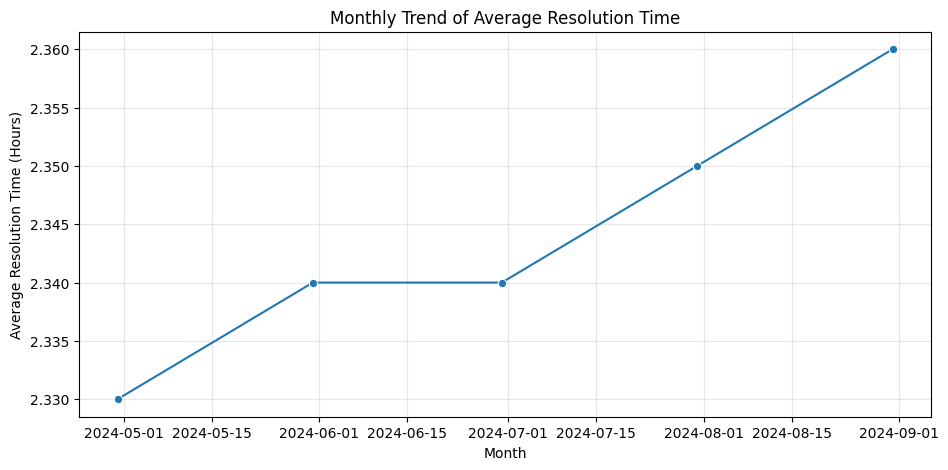

In [31]:
plt.figure(figsize=(11, 5))
sns.lineplot(
    data=monthly_trend,
    x='Created time',
    y='Resolution_Duration',
    marker='o'
)

plt.title('Monthly Trend of Average Resolution Time', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Average Resolution Time (Hours)')
plt.grid(alpha=0.3)

plt.show()

We here observe a upward trend in the average resolution time depicting increasing ticket complexity / workload over time.

A stable performance was noticed in the June'24.

#### Calculate weekly average resolution time

In [32]:
weekly_trend = (
    df_resolved
    .resample('W')['Resolution_Duration']
    .mean()
    .reset_index()
)

weekly_trend['Resolution_Duration'] = weekly_trend['Resolution_Duration'].round(2)


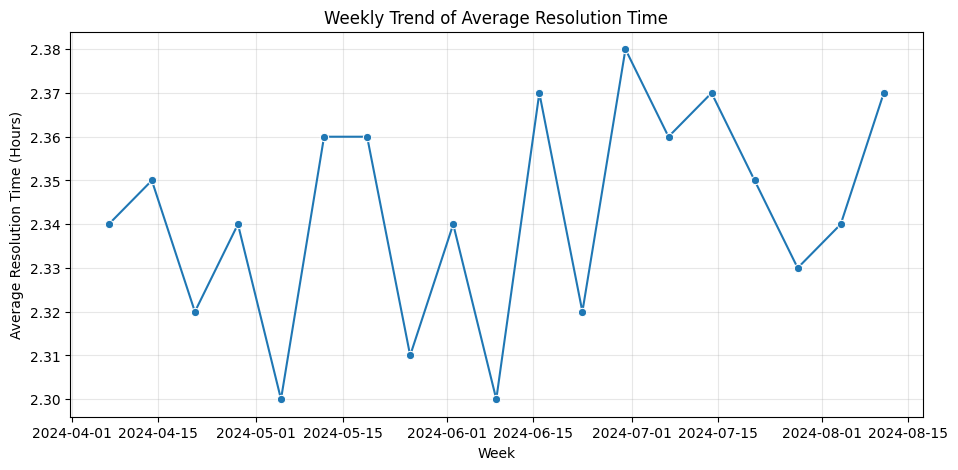

In [33]:
plt.figure(figsize=(11, 5))
sns.lineplot(
    data=weekly_trend,
    x='Created time',
    y='Resolution_Duration',
    marker='o'
)

plt.title('Weekly Trend of Average Resolution Time', fontsize=12)
plt.xlabel('Week')
plt.ylabel('Average Resolution Time (Hours)')
plt.grid(alpha=0.3)

plt.show()

This plot shows
- Short-term performance changes and impact of workload spikes.
- Operational consistency week by week.

### Compare Average Resolution times across Countries

In [34]:
avg_resolution_country = (
    df_resolved
    .groupby('Country')['Resolution_Duration']
    .mean()
    .reset_index()
    .sort_values(by='Resolution_Duration', ascending=False)
)

avg_resolution_country['Resolution_Duration'] = avg_resolution_country['Resolution_Duration'].round(2)
print(avg_resolution_country)

        Country  Resolution_Duration
1        Kuwait                 2.35
3         Qatar                 2.35
5           UAE                 2.35
4  Saudi Arabia                 2.34
2          Oman                 2.34
0       Bahrain                 2.33


Insight:

- Bahrain has fastest tickets resolution time.
- Kuwait, Qatar and UAE have high issue resolution rate.

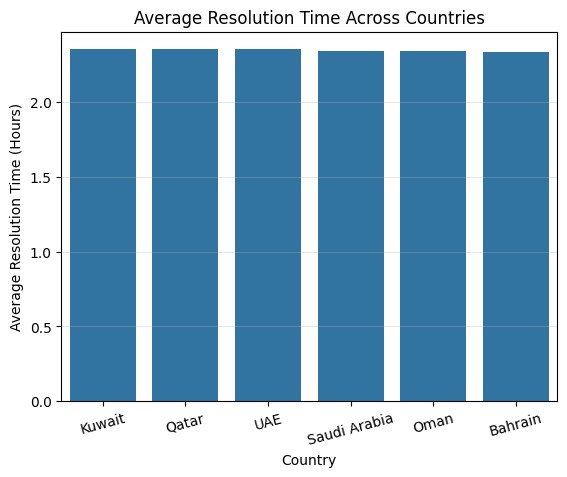

In [35]:
sns.barplot(
    data=avg_resolution_country,
    x='Country',
    y='Resolution_Duration'
)

plt.title('Average Resolution Time Across Countries')
plt.xlabel('Country')
plt.ylabel('Average Resolution Time (Hours)')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

plt.show()

### High-Priority Ticket Count by Ticket Category Group

In [36]:
hp_ticket_count = (
    high_priority_df
    .groupby('Product group')
    .size()
    .reset_index(name='High_Priority_Ticket_Count')
    .sort_values(by='High_Priority_Ticket_Count', ascending=False)
)


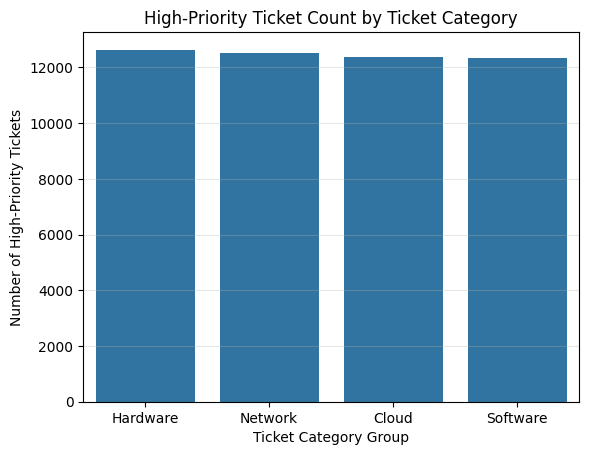

In [37]:
sns.barplot(
    data=hp_ticket_count,
    x='Product group',
    y='High_Priority_Ticket_Count'
)

plt.title('High-Priority Ticket Count by Ticket Category')
plt.xlabel('Ticket Category Group')
plt.ylabel('Number of High-Priority Tickets')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.show()

Insights:
- Most high-priority tickets belong to the Hardware, and subsequently to the Network, then Cloud and least are of Software category.
- Hardware category tickets are delayed and need process improvements.

 ## **Module 6: Geographic and Category-Level Insights**

These insights can help allocate support resources geographically and improve response efficiency.

### Geographic Ticket Concentration

In [38]:
country_ticket_count = (
    df.groupby('Country')
      .size()
      .reset_index(name='Ticket_Count')
)
print(country_ticket_count)

        Country  Ticket_Count
0       Bahrain         16580
1        Kuwait         16640
2          Oman         16540
3         Qatar         17005
4  Saudi Arabia         16635
5           UAE         16600


In [40]:
# converting ticket count per country into a matrix format
heatmap_data = country_ticket_count.set_index('Country')

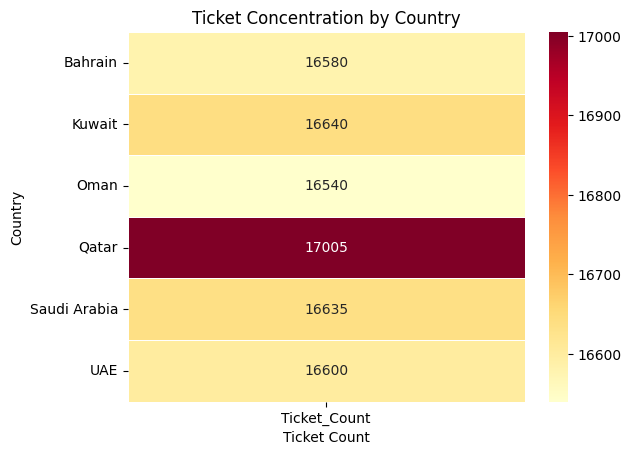

In [41]:
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title('Ticket Concentration by Country', fontsize=12)
plt.ylabel('Country')
plt.xlabel('Ticket Count')

plt.show()


Insights:
- Qatar has highest number of support tickets while Oman has least tickets.
- This suggests greater IT support demand in Qatar.

In [42]:
df.columns

Index(['Status', 'Ticket ID', 'Priority', 'Source', 'Topic', 'Agent Group',
       'Agent Name', 'Created time', 'First response time', 'Resolution time',
       'Close time', 'Agent interactions', 'Survey results', 'Product group',
       'Support Level', 'Country', 'Latitude', 'Longitude', 'Priority_Score',
       'Resolution_Duration', 'First_Response_Duration', 'Category_Encoded',
       'Cluster_ID', 'Similarity_Score'],
      dtype='object')

### Category-Level Geographic Analysis

In [43]:
#ticket count by Category for each Country

ticket_category_country = (
    df.groupby(['Country', 'Product group'])
      .size()
      .reset_index(name='Ticket_Count')
)
print(ticket_category_country)


         Country Product group  Ticket_Count
0        Bahrain         Cloud          4132
1        Bahrain      Hardware          4099
2        Bahrain       Network          4204
3        Bahrain      Software          4145
4         Kuwait         Cloud          4167
5         Kuwait      Hardware          4073
6         Kuwait       Network          4218
7         Kuwait      Software          4182
8           Oman         Cloud          4154
9           Oman      Hardware          4204
10          Oman       Network          4086
11          Oman      Software          4096
12         Qatar         Cloud          4325
13         Qatar      Hardware          4243
14         Qatar       Network          4246
15         Qatar      Software          4191
16  Saudi Arabia         Cloud          4116
17  Saudi Arabia      Hardware          4160
18  Saudi Arabia       Network          4171
19  Saudi Arabia      Software          4188
20           UAE         Cloud          4135
21        

In [44]:
#preparing data for Geo Visualization by grouping one row per location per category with ticket count
geo_category_data = (
    df.groupby(['Country', 'Product group', 'Latitude', 'Longitude'])
      .size()
      .reset_index(name='Ticket_Count')
)
print(geo_category_data)

       Country Product group  Latitude  Longitude  Ticket_Count
0      Bahrain         Cloud   22.0000    50.2508             1
1      Bahrain         Cloud   22.0001    54.9982             1
2      Bahrain         Cloud   22.0006    55.1143             1
3      Bahrain         Cloud   22.0008    55.4461             1
4      Bahrain         Cloud   22.0013    54.6824             1
...        ...           ...       ...        ...           ...
99995      UAE      Software   25.9966    55.4801             1
99996      UAE      Software   25.9978    51.9940             1
99997      UAE      Software   25.9988    54.2949             1
99998      UAE      Software   25.9992    53.0836             1
99999      UAE      Software   25.9993    52.2441             1

[100000 rows x 5 columns]


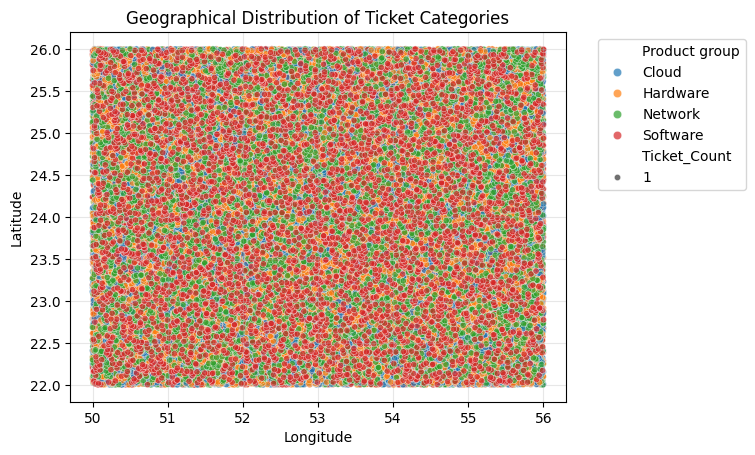

In [45]:
#plotting a Geo-scatter map
sns.scatterplot(
    data=geo_category_data,
    x='Longitude',
    y='Latitude',
    hue='Product group',
    size='Ticket_Count',
    sizes=(20, 500),
    alpha=0.7
)

plt.title('Geographical Distribution of Ticket Categories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.show()


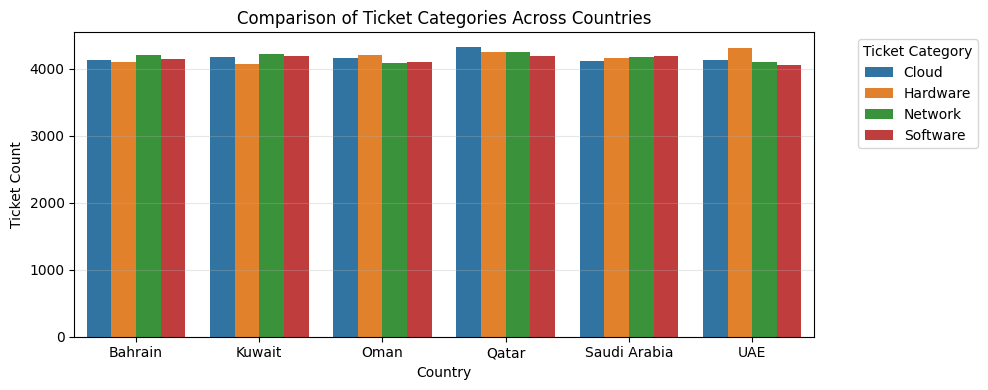

In [47]:
plt.figure(figsize=(10, 4))

sns.barplot(
    data=ticket_category_country,
    x='Country',
    y='Ticket_Count',
    hue='Product group'
)

plt.title('Comparison of Ticket Categories Across Countries')
plt.xlabel('Country')
plt.ylabel('Ticket Count')
plt.xticks(rotation=0)
plt.legend(title='Ticket Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Insights:
- This helps identify country-specific problem areas and tailor support strategies accordingly.
- Bahrain and Kuwait have most tickets of Network category while Oman and UAE have large volume of Hardware tickets.
- Qatar has maximum of the Cloud tickets and Saudi Arabia has most number of Software tickets.


### Average Resolution Time per Country

In [48]:
#calculating average resolution time per country

country_avg_resolution = (
    df_resolved
    .groupby('Country')['Resolution_Duration']
    .mean()
    .reset_index()
    .sort_values(by='Resolution_Duration', ascending=False)
)

country_avg_resolution['Resolution_Duration'] = country_avg_resolution['Resolution_Duration'].round(2)


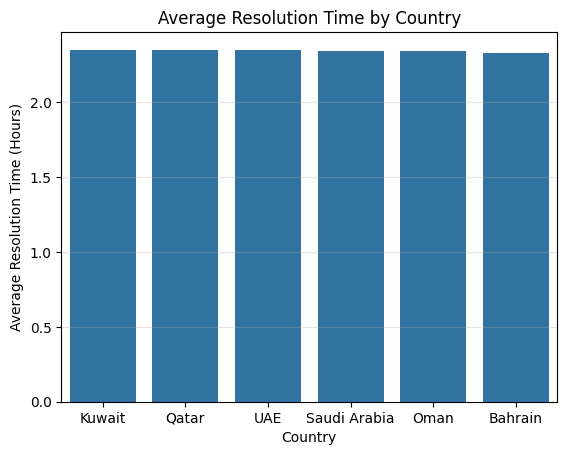

In [49]:
sns.barplot(
    data=country_avg_resolution,
    x='Country',
    y='Resolution_Duration'
)

plt.title('Average Resolution Time by Country')
plt.xlabel('Country')
plt.ylabel('Average Resolution Time (Hours)')
plt.grid(axis='y', alpha=0.3)

plt.show()


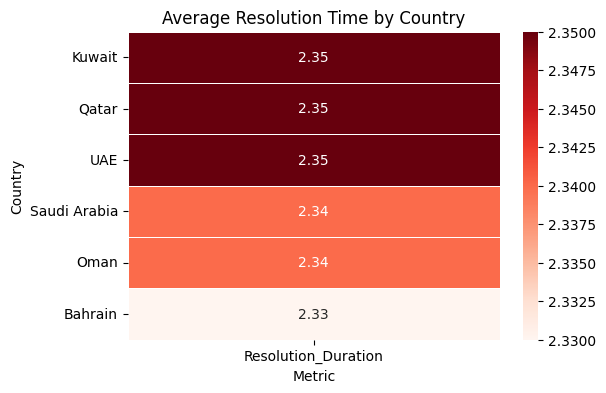

In [50]:
heatmap_data = country_avg_resolution.set_index('Country')

plt.figure(figsize=(6, 4))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='Reds',
    linewidths=0.5
)

plt.title('Average Resolution Time by Country')
plt.xlabel('Metric')
plt.ylabel('Country')

plt.show()


Insights:
- Kuwait, Qatar, and UAE have high resoltion times compared to others, thus they require additional resources or process optimization.
- Bahrain has least average resolution time.

### Evaluating the Relationship between Cluster Size and Performance Score

In [51]:
# Filter resolved tickets with clusters
df_clustered = df[
    (df['Status'].isin(['Resolved', 'Closed'])) &
    (df['Cluster_ID'].notna())
].copy()


In [52]:
# Calculating Cluster Size & Performance Measure
cluster_metrics = (
    df_clustered
    .groupby('Cluster_ID')
    .agg(
        Cluster_Size=('Ticket ID', 'count'),
        Avg_Resolution_Time=('Resolution_Duration', 'mean')
    )
    .reset_index()
)

cluster_metrics['Avg_Resolution_Time'] = cluster_metrics['Avg_Resolution_Time'].round(2)


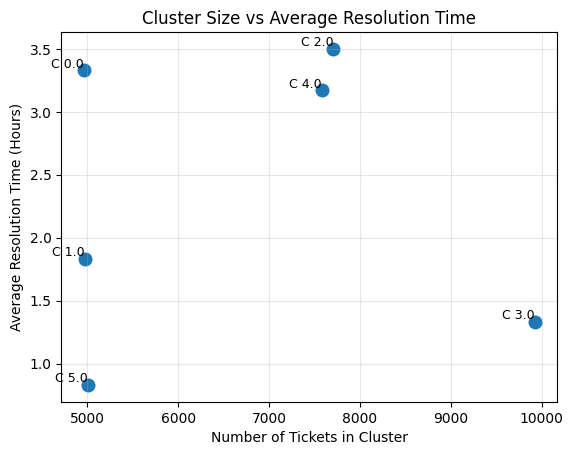

In [53]:
sns.scatterplot(
    data=cluster_metrics,
    x='Cluster_Size',
    y='Avg_Resolution_Time',
    s=120
)

# Add cluster labels
for _, row in cluster_metrics.iterrows():
    plt.text(
        row['Cluster_Size'],
        row['Avg_Resolution_Time'],
        f"C {int(row['Cluster_ID'])}.0",
        fontsize=9,
        ha='right',
        va='bottom'
    )

plt.title('Cluster Size vs Average Resolution Time')
plt.xlabel('Number of Tickets in Cluster')
plt.ylabel('Average Resolution Time (Hours)')
plt.grid(alpha=0.3)

plt.show()


Key Insights:
- Since we find no clear trend, so workload(cluster size) is not the main driver (skill or category matters more).
- Cluster 5.0 has efficient and simple issues.
- Even though cluster 3.0 has large volume of tickets, it has efficient ticket performance.
- Cluster 0.0 has least tickets yet having high resolution time, which is suggesting overloaded or complex ticket issues.


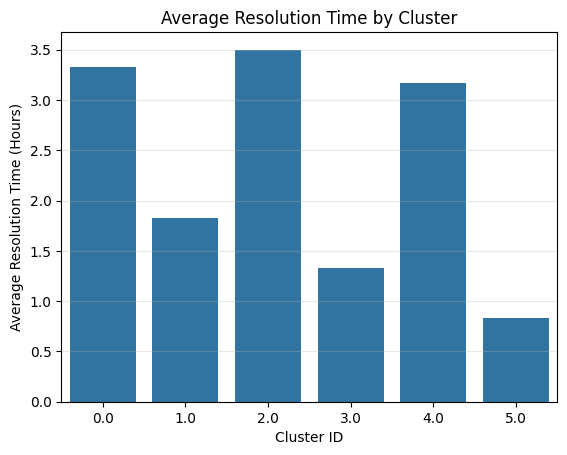

In [54]:
sns.barplot(
    data=cluster_metrics,
    x='Cluster_ID',
    y='Avg_Resolution_Time'
)

plt.title('Average Resolution Time by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average Resolution Time (Hours)')
plt.grid(axis='y', alpha=0.3)

plt.show()


Insights:
- The analysis shows variation in average resolution time across clusters.
- Cluster 2.0 has maximum average resolution time, indicating potential workload imbalance or  repetitive issue patterns.
- These insights can guide better resource allocation and targeted process improvements by identifying the clusters causing performance degradation.